In [1]:
# -*- coding: UTF-8 -*-
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import codecs
import jieba.posseg as pseg 
import os
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
from collections import Counter
import jieba
jieba.load_userdict('userdict.txt')

# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()]
    return stopwords

# 对句子进行分词
def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    stopwords = stopwordslist('stoped.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/89/qp8kb90s49z7xcdskq2c0qlm0000gn/T/jieba.cache
Loading model cost 0.689 seconds.
Prefix dict has been built succesfully.


In [3]:
'''file_name='班主任'
file_path = './dataset/raw_texts/'+file_name+'.txt'
text = open(file_path, 'r',encoding="utf-8") #加载要处理的文件的路径
#df =pd.read_excel('./dataset/难字词库.xlsx') 
#diff_words = df['词语']
result_words = []
sent_arr = []
words_arr = []
for block in text:
    #print(type(block))
    words=list(seg_sentence(block).split(' '))
    #print(words)
    for word in words:
        #print(word)
        words_arr.append(word)'''

'file_name=\'班主任\'\nfile_path = \'./dataset/raw_texts/\'+file_name+\'.txt\'\ntext = open(file_path, \'r\',encoding="utf-8") #加载要处理的文件的路径\n#df =pd.read_excel(\'./dataset/难字词库.xlsx\') \n#diff_words = df[\'词语\']\nresult_words = []\nsent_arr = []\nwords_arr = []\nfor block in text:\n    #print(type(block))\n    words=list(seg_sentence(block).split(\' \'))\n    #print(words)\n    for word in words:\n        #print(word)\n        words_arr.append(word)'

In [4]:
def get_all_vector(file_path,stop_words_set):
    names = [ os.path.join(file_path,f) for f in os.listdir(file_path) ]
    posts = [ open(name,'rb').read() for name in names ]
    docs = []
    word_set = set()
    rest_words = []
    i=0
    for post in posts:
        #doc = del_stop_words(post,stop_words_set)
        doc = list(seg_sentence(post).split(' '))
        #print(doc)
        docs.append(doc)
        word_set |= set(doc)
        
    word_set = list(word_set)
    print(len(word_set))
    docs_vsm = []
    #for word in word_set[:30]:
        #print word.encode("utf-8"),
    for doc in docs:
        #遍历每篇文章
        temp_vector = []
        for word in word_set:
            i+=1
           
            rest_words.append(word)
            #计算当前文章有多少这个词
            temp_vector.append(doc.count(word) * 1.0)
        #print temp_vector[-30:-1]
        #print(temp_vector)
        docs_vsm.append(temp_vector)
    print(len(docs_vsm))
    docs_matrix = np.array(docs_vsm)
    #print(docs_matrix)
    column_sum = [ float(len(np.nonzero(docs_matrix[:,i])[0])) for i in range(docs_matrix.shape[1]) ]
    column_sum = np.array(column_sum)
    column_sum = docs_matrix.shape[0] / column_sum
    idf =  np.log(column_sum)
    idf =  np.diag(idf)
    # 根据IDF的定义，计算词的IDF并不依赖于某个文档，所以我们提前计算好。
    # 注意一下计算都是矩阵运算，不是单个变量的运算。
    
    for doc_v in docs_matrix:
        if doc_v.sum() == 0:
            doc_v = doc_v / 1
        else:
            doc_v = doc_v / (doc_v.sum())
        tfidf = np.dot(docs_matrix,idf)
    return names,tfidf,word_set



In [5]:
stopwords = stopwordslist('stoped.txt')
files_path = './dataset/raw_texts/'
names,tfidf,word_set = get_all_vector(files_path,stopwords)

3511
9


In [6]:
names

['./dataset/raw_texts/.DS_Store',
 './dataset/raw_texts/high_school_2.txt',
 './dataset/raw_texts/high_school_1.txt',
 './dataset/raw_texts/baby_1.txt',
 './dataset/raw_texts/university_2.txt',
 './dataset/raw_texts/university_1.txt',
 './dataset/raw_texts/baby-2.txt',
 './dataset/raw_texts/primary_1.txt',
 './dataset/raw_texts/primary_2.txt']

In [7]:
'''book_titles = ['恋爱的犀牛剧本','远方飞来了一只红蜻蜓','开市客火爆背后，美国零售业经历过的惨烈搏杀','班主任',
               '温柔的夜-三毛','产业基础高级化 发展迈向高质','白雪公主','小美人鱼','老屋小记',
               '冯骥才-这个时代文化的使命首先是抢救','过年','春','金童求雨记']'''

"book_titles = ['恋爱的犀牛剧本','远方飞来了一只红蜻蜓','开市客火爆背后，美国零售业经历过的惨烈搏杀','班主任',\n               '温柔的夜-三毛','产业基础高级化 发展迈向高质','白雪公主','小美人鱼','老屋小记',\n               '冯骥才-这个时代文化的使命首先是抢救','过年','春','金童求雨记']"

In [8]:
book_titles = []
for path in names:
    title = path.split('.')[1].split('/')[3]
    #print(title)
    if title != '':
        #print(title)
        book_titles.append(title)

In [9]:
df = pd.DataFrame(tfidf)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,2.197225,0.000000,2.197225,2.197225,2.197225,0.000000,0.000000,2.197225,0.000000,...,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,2.197225,0.000000,1.504077
2,0.0,0.000000,2.197225,0.000000,0.000000,0.000000,2.197225,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.504077,1.504077
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.504077,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.197225,0.000000,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,0.000000,2.197225,...,0.000000,0.000000,4.394449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.394449,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000


In [11]:
#df['文本标题']=book_titles
#df = df.set_index('文本标题')

In [12]:
df = df.T


In [13]:
df['词语'] = word_set

In [14]:
new_df = df.set_index('词语')

In [15]:
#tmp_df = new_df.sort_values(by = '冯骥才-这个时代文化的使命首先是抢救',axis = 0,ascending = False)
#tmp_df.head(10)

In [16]:
book_titles

['high_school_2',
 'high_school_1',
 'baby_1',
 'university_2',
 'university_1',
 'baby-2',
 'primary_1',
 'primary_2']

In [19]:

'''for book_title in tmp_df.columns:
    print(book_title)
    kw_dict = tmp_df[[book_title]].sort_values(by = book_title,axis = 0,ascending = False).head(20).T.to_dict(orient="list")
    print(kw_dict)'''
    #print(kw_dict.keys())
    #print(kw_dict.values())
#    print(tmp_df[book_title].sort_values(ascending = False))
    

'for book_title in tmp_df.columns:\n    print(book_title)\n    kw_dict = tmp_df[[book_title]].sort_values(by = book_title,axis = 0,ascending = False).head(20).T.to_dict(orient="list")\n    print(kw_dict)'

In [20]:
#kw_dict = tmp_df[['小美人鱼']].sort_values(by = '小美人鱼',axis = 0,ascending = False).head(70).T.to_dict(orient="list")
#kw_dict

In [68]:
num_clusters = 5
km_cluster = KMeans(n_clusters=num_clusters, max_iter=30, n_init=10, \
                    init='k-means++',n_jobs=10)

'''
n_clusters: 指定K的值
max_iter: 对于单次初始值计算的最大迭代次数
n_init: 重新选择初始值的次数
init: 制定初始值选择的算法
n_jobs: 进程个数，为-1的时候是指默认跑满CPU
注意，这个对于单个初始值的计算始终只会使用单进程计算，
并行计算只是针对与不同初始值的计算。比如n_init=10，n_jobs=40, 
服务器上面有20个CPU可以开40个进程，最终只会开10个进程
'''
#返回各自文本的所被分配到的类索引
result = km_cluster.fit_predict(tfidf)


In [69]:
result

array([1, 2, 0, 0, 0, 3, 4, 0, 0], dtype=int32)

In [70]:
names

['./dataset/raw_texts/.DS_Store',
 './dataset/raw_texts/high_school_2.txt',
 './dataset/raw_texts/high_school_1.txt',
 './dataset/raw_texts/baby_1.txt',
 './dataset/raw_texts/university_2.txt',
 './dataset/raw_texts/university_1.txt',
 './dataset/raw_texts/baby-2.txt',
 './dataset/raw_texts/primary_1.txt',
 './dataset/raw_texts/primary_2.txt']

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
#Note that 有了 dist 就可以测量任意两个或多个概要之间的相似性.
#cosine_similarity返回An array with shape (n_samples_X, n_samples_Y)
dist = 1 - cosine_similarity(tfidf)
type(dist)

numpy.ndarray

In [72]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
#Perform Ward's linkage on a condensed distance matrix.
#linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
#Method 'ward' requires the distance metric to be Euclidean
linkage_matrix = linkage(dist, method='single', metric='euclidean', optimal_ordering=False)
#Z[i] will tell us which clusters were merged, let's take a look at the first two points that were merged
#We can see that ach row of the resulting array has the format [idx1, idx2, dist, sample_count]
print(linkage_matrix)
for index, name in enumerate(names):
    print(index, name)


[[ 1.          6.          1.26064054  2.        ]
 [ 2.          9.          1.35081005  3.        ]
 [ 5.          7.          1.35393958  2.        ]
 [ 4.         10.          1.3665802   4.        ]
 [ 8.         12.          1.38164868  5.        ]
 [11.         13.          1.38836022  7.        ]
 [ 3.         14.          1.40292148  8.        ]
 [ 0.         15.          1.41431899  9.        ]]
0 ./dataset/raw_texts/.DS_Store
1 ./dataset/raw_texts/high_school_2.txt
2 ./dataset/raw_texts/high_school_1.txt
3 ./dataset/raw_texts/baby_1.txt
4 ./dataset/raw_texts/university_2.txt
5 ./dataset/raw_texts/university_1.txt
6 ./dataset/raw_texts/baby-2.txt
7 ./dataset/raw_texts/primary_1.txt
8 ./dataset/raw_texts/primary_2.txt


In [76]:
for ele in linkage_matrix:
    print(ele[2])

1.2606405419566298
1.3508100521699506
1.3539395838738402
1.3665801971183202
1.3816486849895264
1.3883602244868056
1.4029214840395783
1.4143189880843583


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


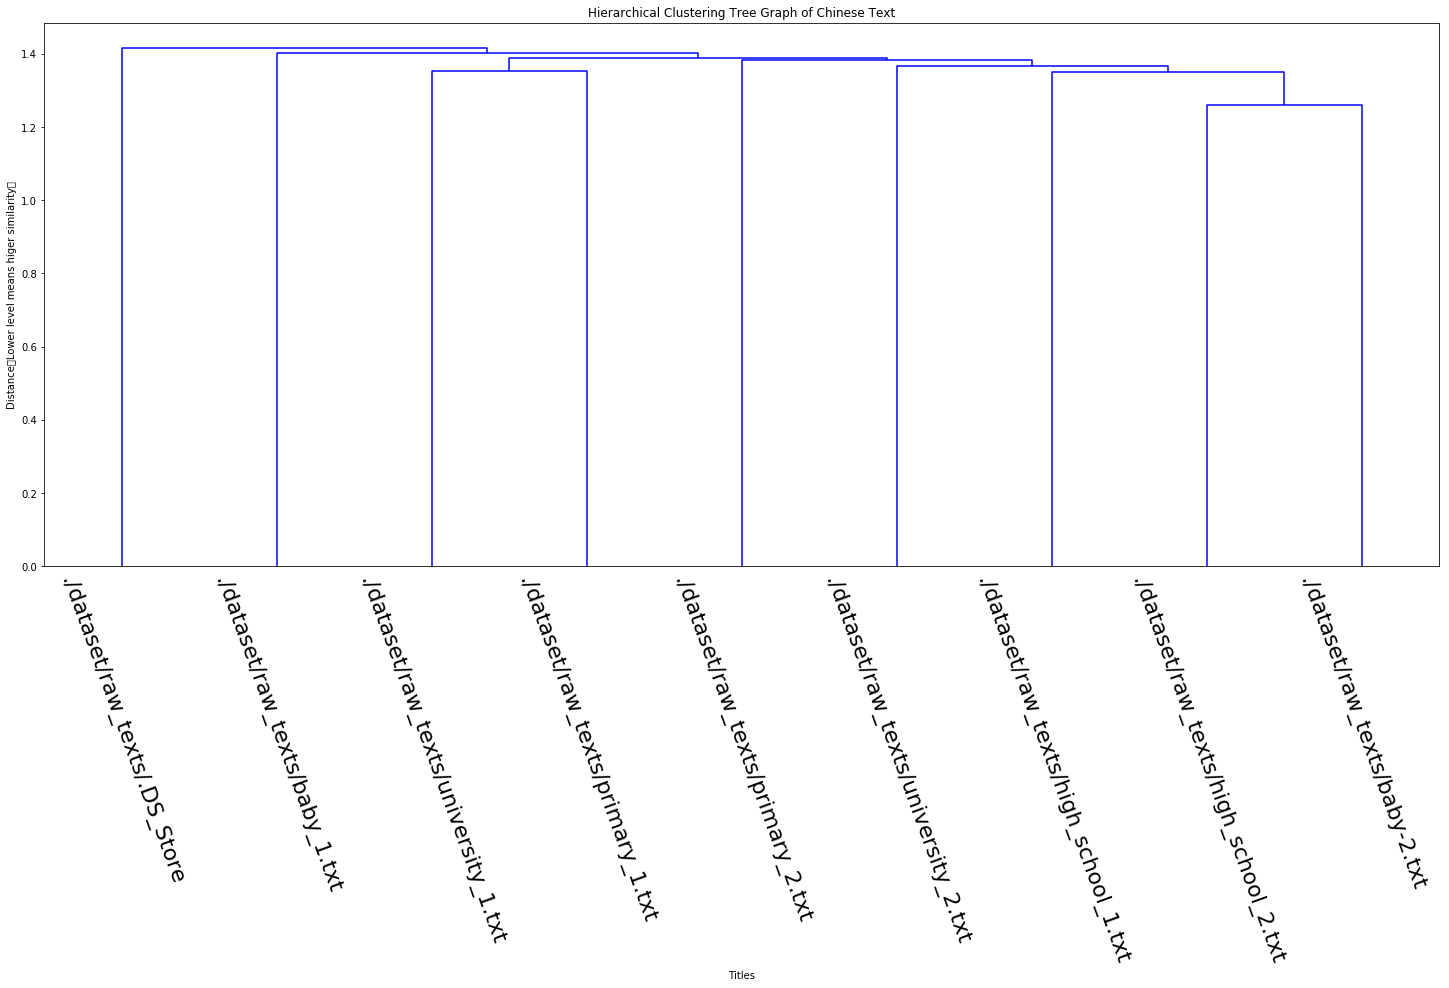

In [73]:

import matplotlib.pyplot as plt
 
from pylab import *
#plt.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(25, 10))
#plt.title('中文文本层次聚类树状图')

plt.title('Hierarchical Clustering Tree Graph of Chinese Text')
plt.xlabel('Titles')
plt.ylabel('Distance（Lower level means higer similarity）')
dendrogram(
    linkage_matrix,
    labels=names, 
    leaf_rotation=-70,  # rotates the x axis labels
    leaf_font_size=22  # font size for the x axis labels
)
plt.show()
plt.close()

